In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

In [5]:
#loading the data. The first two columns are the scores and the third is the label

data = np.loadtxt('ex2data1.txt', delimiter=',')
X,y = data[:,:2], data[:,2]

In [6]:
print(X.shape)

(100, 2)


In [7]:
print(y.shape)

(100,)


In [8]:
X[:5], y[:5]

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644]]), array([0., 0., 0., 1., 1.]))

In [9]:
#Creating plotdata method to plot the data where the axis are two exam scores
def Plotdata(X,y, xlabel, ylabel, labelPos, labelNeg):
    
    #sepaarating positive and negative scores
    pos = y==1
    neg = y==0
    
    plt.scatter(X[pos,0], X[pos,1], s=30, c='darkblue', marker ='+', label = labelPos)
    plt.scatter(X[neg,0], X[neg,1], s=30, c='pink', marker ='o', label = labelNeg)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim(X[:,0].min(), X[:,0].max())
    plt.ylim(X[:,1].min(), X[:,1].max())
    
    #Legend
    pst = plt.legend(loc = 'upper right', frameon = True)
    pst.get_frame().set_edgecolor('k')

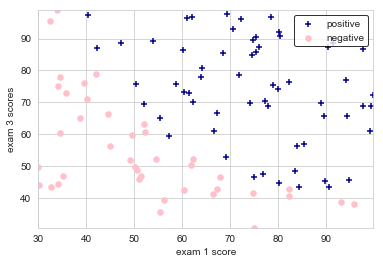

In [10]:
Plotdata(X,y,'exam 1 score','exam 3 scores','positive','negative')

# 1) Sigmoid Function

In [15]:
from scipy.special import expit

def sigmoid(z):
    #return (1/(1+(np.exp(-z))))
    return expit(z)

In [16]:
sigmoid(20)

0.9999999979388463

Text(0,0.5,'sigmoid(x)')

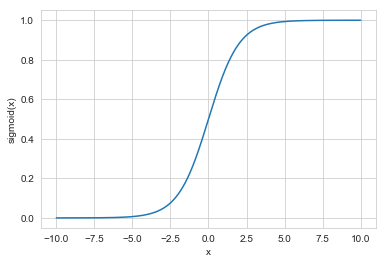

In [21]:
#Testing the sigmoid function

test_sig = np.linspace(-10,10,10000)
out_sig = sigmoid(test_sig)
plt.plot(test_sig, out_sig)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

# 2) Cost function and gradient

In [50]:
#Cost function

def Costfunction (theta, X, y):
    m = len(y)
    
    z = np.dot(X, theta)
    
    htheta = sigmoid(z)
    
    J= -( (np.dot(y, np.log(htheta))) + (np.dot((1-y), np.log(1-htheta))) )/m
    
    return J
    

In [53]:
#gradient function

def gradientdescent(theta,X,y):
    m = len(y)
    z = np.dot(X,theta)
    htheta = sigmoid(z)
    
    return np.dot( X.T, (htheta - y))/m 

In [31]:
#Stack 1s onto the left of X for the bias parameter

X = np.hstack((np.ones((X.shape[0],1)), X))

In [48]:
theta = np.zeros(X.shape[1])

In [54]:
J = Costfunction(theta, X, y)
gradient = gradientdescent(theta, X, y)

print("Cost : %0.3f",J)
print("Gradient : {0}".format(gradient))

Cost : %0.3f 0.6931471805599452
Gradient : [ -0.1        -12.00921659 -11.26284221]


In [43]:
X.shape

(100, 3)

In [44]:
theta.shape

(3,)

In [45]:
np.dot(X,theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 3) Optimizing parameters

In [56]:
from scipy.optimize import minimize

#find the best parameters for theta using the functions we created earlier
#expecting to see cost around 0.23 per assignment

result = minimize(Costfunction, theta, args=(X,y), method = 'BFGS', jac = gradientdescent, options = {'maxiter':400, 'disp':True})
result

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


      fun: 0.20349770158944375
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476836e-09, -9.31921327e-07, -2.82608940e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [58]:
#store the parameters and plot decision boundary

gradBFGS = result['x']

#decision boundary theta0 + theta1x1 + theta2x2 = 0
therefore x2 = theta1*x1 

array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [61]:
plot_x = np.array([np.min(X[:,1])-1, np.max(X[:,1])+1])
plot_y = (gradBFGS[0] + gradBFGS[1]*plot_x)/(-gradBFGS[2])


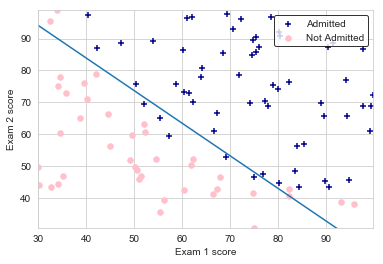

In [66]:
Plotdata(X[:,1:], y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
plt.plot(plot_x, plot_y)

In [67]:
#compute probability of admission for a student with score 45 and 85

#we know the parameteres, compute z, find sigmoid
probability = sigmoid(gradBFGS[0] + gradBFGS[1]*45 + gradBFGS[2]*85)
probability

0.7762907240588938

In [78]:
#Now we will compute the training accuracy to see the number of training examples it got correct, 


def predict(theta, X):
    hThetaX = sigmoid(np.dot(X, theta))

    arr = []
    for h in hThetaX: 
        if (h>0.5):
            arr.append(1)
        else:
            arr.append(0)
    return np.array(arr)

In [79]:
p = predict(gradBFGS,X)

In [80]:
print('Training Accuracy of the classifier: {0}%'.format(np.sum(p==y) / p.size * 100))


Training Accuracy of the classifier: 89.0%


# 4) Regularized Logistic regression

In [87]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X,y = data[:,:2], data[:,2]

In [88]:
X.shape

(118, 2)

In [89]:
y.shape

(118,)

In [90]:
x1,x2 = X[:,0], X[:,1]


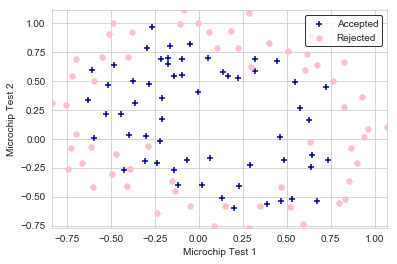

In [91]:
Plotdata(X,y,'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')

## 4.1) Feature mapping
Because the decision boundary is non-linear we would like to add polynomial features. We can do this by using PolynomialFeatures from scikitlearn preprocessing 

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)

X2 = poly.fit_transform(X)
X2.shape

(118, 28)

## 4.2) Writing cost and gradient descent functions for regularized logistic regression

In [127]:
def costfunctionreg(theta, X, y,lam):
    
    m = len(y)
    
    hThetaX = sigmoid(np.dot(X,theta))
    
    J = -(np.dot(y, np.log(hThetaX)) + np.dot((1-y), np.log(1-hThetaX)) + (lam * np.sum(np.square(theta[1:]) / 2)))/m
    return J
    #regular cost function
    #J = (-1/m) * [ (np.dot(y,np.log(hThetaX)) + np.dot((1-y),np.log(1-hThetaX))) + ( lam * np.sum(np.square[theta]) / 2) ]

In [111]:
def gradientdescentR(theta, X, y, lam):
    
    hThetaX = sigmoid(np.dot(X, theta))
    m = len(y)
    
    new_Theta = np.insert(theta[1:],0,0)
    
    gradient = (np.dot(X.T, hThetaX-y) + lam*new_Theta)/m
    return gradient

In [119]:
#initialize theta
initial_theta = np.zeros(X2.shape[1])
initial_theta.shape

(28,)

In [134]:
#call the functions
J = costfunctionreg(initial_theta, X2, y, 1)
grad = gradientdescentR(initial_theta, X2, y, 1)

print("Cost : %0.3f"%J)
print("Gradient :{0}".format(grad))

Cost : 0.693
Gradient :[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


## 4.3) Using bfgs to find optimal theta parameters

In [139]:
result = minimize(costfunctionreg, initial_theta, args = (X2, y,1), jac = gradientdescentR, method = 'BFGS', options ={'maxiter':400, 'disp':True} )

         Current function value: 0.390922
         Iterations: 19
         Function evaluations: 122
         Gradient evaluations: 110


In [140]:
print(result['x'])

[ 1.26787151  0.63371734  1.18338996 -2.02409378 -0.93685564 -1.30890117
  0.10793144 -0.38646139 -0.39189343 -0.21181685 -1.51332973 -0.11429772
 -0.60469456 -0.29719764 -1.2321628  -0.27583993 -0.23549064 -0.07496995
 -0.27629439 -0.31351069 -0.57980369 -1.11349606 -0.01745556 -0.2943816
 -0.01374317 -0.32547053 -0.16181337 -1.06515635]


## 4.4) Plotting decision boundary

In [165]:
def plotdecisionboundary(X, y, title):
    Plotdata(X[:,1:3], y, 'Microchip 1', 'Microchip 2','Accepted','Rejected')
    
    #defining the data to use in the meshgrid calculations
    x_min, x_max = X[:,1].min()-1, X[:,1].max()+1
    y_min, y_max = X[:,2].min()-1, X[:,2].max()+1
    
    xx,yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    
    #create a matrix from this meshgrid
    mesh_X = np.c_[xx.ravel(),yy.ravel()]
    
    #create polynomial of this new matrix
    polymesh_X = poly.fit_transform(mesh_X)
    
    #find Z
    z = np.dot(polymesh_X,result['x'])
    z_out = sigmoid(z)
    
    z_out = z.reshape(xx.shape)
    
    #plot contour 
    plt.contour(xx,yy, z_out, [0.5])
    

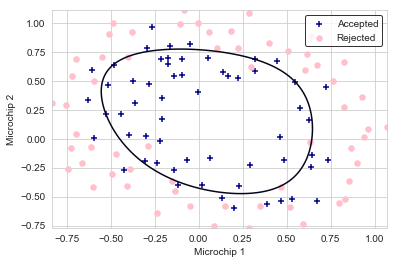

In [166]:
plotdecisionboundary(X2,y,'blah')